In [1]:
from pandas import read_csv
from matplotlib import pyplot
import sys
import numpy as np
import pandas as pd
from datetime import datetime
from keras.utils import to_categorical


2024-12-18 16:59:27.533986: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-18 16:59:27.542952: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734537567.552571  129881 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734537567.555135  129881 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-18 16:59:27.564982: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
colors = ['#BB0000', '#0000BB', 'green','red', 'yellow', 'pink']

def prinUserSensorData(dataS, label,s):
    df = pd.DataFrame()
    ts=[]
    ls=[]
    #print(dataS.shape)
    for t in range(0,dataS.shape[0]):
        ts.append(dataS[t][0])
    df['Time']=ts
    #print(ts)
#    for s in range(1,dataS.shape[1]):
    ls.append(label+" #column-"+str(s))
    #print(dataS[:,s].shape)
    df[label+" #column-"+str(s)]=dataS[:,s]

    print(ls)
    
    df.plot(x="Time",y=ls,subplots=True, legend=True, figsize=(15,5), color=colors[s-1])    
    


In [3]:
import numpy as np
import sys

folder = "./data"

users = ["Mix"]
files = ["der1", "der2",
         "der3", "der4",
         "der5", "der6",
         "der7", "der8",
         "izq1", "izq2",
         "izq5", "izq6",
         "izq7", "izq8",
         "sim1", "sim2",
         "sim3", "sim4",
         "sim5", "sim6",
         "sim7", "sim8"]

cross = [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]


sensors = ["s1", "s2"]

tW = list(range(-5000, 100, 50))

print(tW)
print(len(tW))

tStep = 150

index_t = 0

def getAVG(vs):
    if len(vs) == 0:
        return 0
    if np.isnan(np.median(vs)):
        return -1
    return np.median(vs)

def smoothData(data):
    for ix in range(1, 14):
        data[:, ix] = data[:, ix].astype(float)
        lastV = 0.0
        for jx in range(len(data[:, ix])):
            data[jx, ix] = data[jx, ix] * 0.2 + lastV * 0.8
            lastV = data[jx, ix]

def smoothDataTime(data):
    data[:, 0] = data[:, 0].astype(float)
    tA = []
    lastT = -1
    for jx in range(len(data[:, 0])):
        t0 = data[jx, 0]
        if t0 > lastT + 50:
            lastT = t0
            tA.append(t0)
    retV = np.zeros((len(tA), 14))
    for ix in range(1, 14):
        data[:, ix] = data[:, ix].astype(float)
        lastT = -1
        lV = []
        vA = []
        for jx in range(len(data[:, ix])):
            t0 = data[jx, 0]
            if t0 > lastT + 50:
                lastT = t0
                vA.append(np.median(lV))
                lV = []
            else:
                lV.append(data[jx, ix])
        retV[:, ix] = np.array(vA)
    retV[:, 0] = np.array(tA)
    return retV

def cleanDataFile(filename):
    ret = []
    count = 0
    with open(filename) as file:
        next(file) 
        for line0 in file:
            count += 1
            line = line0.strip()
            line = line.replace(',', '.').split('\t')  
            if len(line) != 14:
                print("NOT 14# in ", count, " -> ", line)
                continue
            try:
                # Convert each item in the line to float; replace empty strings with 0.0
                ret.append([float(x) if x else 0.0 for x in line])
            except ValueError as e:
                print("Error in line ", line, ":", e)
    return ret


def getLabels(t0, labels):
    for l in labels:
        if l[0] <= t0 <= l[1]:
            return l[2]
    return None

[-5000, -4950, -4900, -4850, -4800, -4750, -4700, -4650, -4600, -4550, -4500, -4450, -4400, -4350, -4300, -4250, -4200, -4150, -4100, -4050, -4000, -3950, -3900, -3850, -3800, -3750, -3700, -3650, -3600, -3550, -3500, -3450, -3400, -3350, -3300, -3250, -3200, -3150, -3100, -3050, -3000, -2950, -2900, -2850, -2800, -2750, -2700, -2650, -2600, -2550, -2500, -2450, -2400, -2350, -2300, -2250, -2200, -2150, -2100, -2050, -2000, -1950, -1900, -1850, -1800, -1750, -1700, -1650, -1600, -1550, -1500, -1450, -1400, -1350, -1300, -1250, -1200, -1150, -1100, -1050, -1000, -950, -900, -850, -800, -750, -700, -650, -600, -550, -500, -450, -400, -350, -300, -250, -200, -150, -100, -50, 0, 50]
102


In [4]:
X=[]
Y=[]
S=[]
N=0



for ixu,us in enumerate(users):    
    for ixc,cl in enumerate(files):
            t0=0
            tMaxMin=sys.maxsize 
            interval=False
            #idx_sensor={}
            sensorData={}
            for isx,sn in enumerate(sensors):
                #idx_sensor[sn]=[]
                print(folder+"/"+us+"/"+cl+"/"+str(sn)+".txt")
                data=cleanDataFile(folder+"/"+us+"/"+cl+"/"+str(sn)+".txt")
                data=np.array(data)
                smoothData(data)
                #prinUserSensorData(data)
                sensorData[sn]=data
                tMax=0
                tMin=sys.maxsize 
                for ixd,d in enumerate(data):
                    #idx_sensor[sn].append(ixd)
                    if(d[index_t]>tMax):
                        tMax=d[index_t]
                    if(d[index_t]<tMin):
                        tMin=d[index_t]                        
                tMaxMin=min(tMaxMin,tMax-tMin)
                
            labels=read_csv(folder+"/"+us+"/"+cl+"/info.txt", sep="\t",parse_dates=True,header=None, decimal=".")
            labels=labels.values
            print(labels)
            
            tMaxMin=int(tMaxMin)
            print(cl," tMaxMin:",tMaxMin)
                        
            for t in range(0-min(tW),tMaxMin-max(tW),tStep):
                print(t/(tMaxMin-max(tW))*100, "t#",t)
                
                label=getLabels(t,labels)
                if (not label):
                    continue
                xi=[]
                for sn in sensors:
                    data=sensorData[sn]
                    tRef=np.min(data[:,index_t])

                    
                    xi1=[]
                    xi2=[]
                    xi3=[]
                    xi4=[]
                    xi5=[]
                    xi6=[]
                    xi7=[]
                    xi8=[]
                    xi9=[]
                    xi10=[]
                    xi11=[]
                    xi12=[]
                    
                    for it in range(len(tW)-2,-1,-1):

                        tr=t+tRef+np.random.normal(0, 25)

                        t0=tr+tW[it]
                        tN=tr+tW[it+1]
                        ag1=data[np.where((data[:,index_t] >= t0) & (data[:,index_t] <=  tN))]
                        #print("\t t0,tN,#,t,it,tRef",t0,tN,len(ag1),t,it,tW[it],tRef)
                        #print("cl",cl,"sc",sc,"sn",sn,"t+:",t,"tRef:",tRef,"t0:",t0,"tN:",tN," ag1:", ag1)
                        #ag0=data[np.where((data[:,index_t] >= tr-5000) & (data[:,index_t] <=  tr+5000))]
                        
                        

                        #añadimos info sensores inerciales
                        
                        xi1.append(getAVG(ag1[:,2].astype(float)))
                        xi2.append(getAVG(ag1[:,3].astype(float)))
                        xi3.append(getAVG(ag1[:,4].astype(float)))
                        xi4.append(getAVG(ag1[:,5].astype(float)))
                        xi5.append(getAVG(ag1[:,6].astype(float)))
                        xi6.append(getAVG(ag1[:,7].astype(float)))      
                        xi7.append(getAVG(ag1[:,8].astype(float))) 
                        xi8.append(getAVG(ag1[:,9].astype(float))) 
                        xi9.append(getAVG(ag1[:,10].astype(float))) 
                        xi10.append(getAVG(ag1[:,11].astype(float))) 
                        xi11.append(getAVG(ag1[:,12].astype(float))) 
                        xi12.append(getAVG(ag1[:,13].astype(float))) 

                    #print("\t",np.array(xi1).shape)
                    xi.append(xi1)
                    xi.append(xi2)
                    xi.append(xi3)
                    xi.append(xi4)
                    xi.append(xi5)
                    xi.append(xi6)
                    xi.append(xi7)
                    xi.append(xi8)
                    xi.append(xi9)
                    xi.append(xi10)
                    xi.append(xi11)
                    xi.append(xi12)

                #print("",np.array(xi).shape)    
                X.append(np.transpose(xi))
                Y.append(label)
                print(len(cross))
                S.append(cross[ixc])

        
X=np.array(X)
S=np.array(S)
Y=np.array(Y)

print(X.shape)
print(Y.shape)    
print(S.shape) 

                

./data/Mix/der1/s1.txt
./data/Mix/der1/s2.txt
[[40180 64570 'der']
 [79280 100050 'der']]
der1  tMaxMin: 151810
3.2946758039008963 t# 5000
3.393516078017923 t# 5150
3.4923563521349497 t# 5300
3.5911966262519766 t# 5450
3.6900369003690034 t# 5600
3.788877174486031 t# 5750
3.8877174486030577 t# 5900
3.986557722720084 t# 6050
4.085397996837111 t# 6200
4.184238270954138 t# 6350
4.283078545071165 t# 6500
4.381918819188193 t# 6650
4.480759093305219 t# 6800
4.5795993674222455 t# 6950
4.678439641539272 t# 7100
4.777279915656299 t# 7250
4.876120189773326 t# 7400
4.974960463890353 t# 7550
5.07380073800738 t# 7700
5.172641012124407 t# 7850
5.271481286241434 t# 8000
5.370321560358461 t# 8150
5.4691618344754875 t# 8300
5.568002108592514 t# 8450
5.666842382709541 t# 8600
5.765682656826568 t# 8750
5.864522930943595 t# 8900
5.963363205060622 t# 9050
6.062203479177649 t# 9200
6.161043753294676 t# 9350
6.259884027411703 t# 9500
6.3587243015287305 t# 9650
6.4575645756457565 t# 9800
6.5564048497627825 t# 

./data/Mix/der2/s2.txt
[[114380 135290 'der']]
der2  tMaxMin: 151810
3.2946758039008963 t# 5000
3.393516078017923 t# 5150
3.4923563521349497 t# 5300
3.5911966262519766 t# 5450
3.6900369003690034 t# 5600
3.788877174486031 t# 5750
3.8877174486030577 t# 5900
3.986557722720084 t# 6050
4.085397996837111 t# 6200
4.184238270954138 t# 6350
4.283078545071165 t# 6500
4.381918819188193 t# 6650
4.480759093305219 t# 6800
4.5795993674222455 t# 6950
4.678439641539272 t# 7100
4.777279915656299 t# 7250
4.876120189773326 t# 7400
4.974960463890353 t# 7550
5.07380073800738 t# 7700
5.172641012124407 t# 7850
5.271481286241434 t# 8000
5.370321560358461 t# 8150
5.4691618344754875 t# 8300
5.568002108592514 t# 8450
5.666842382709541 t# 8600
5.765682656826568 t# 8750
5.864522930943595 t# 8900
5.963363205060622 t# 9050
6.062203479177649 t# 9200
6.161043753294676 t# 9350
6.259884027411703 t# 9500
6.3587243015287305 t# 9650
6.4575645756457565 t# 9800
6.5564048497627825 t# 9950
6.65524512387981 t# 10100
6.7540853979

10
75.54691618344755 t# 114650
10
75.64575645756457 t# 114800
10
75.7445967316816 t# 114950
10
75.84343700579863 t# 115100
10
75.94227727991566 t# 115250
10
76.04111755403268 t# 115400
10
76.1399578281497 t# 115550
10
76.23879810226674 t# 115700
10
76.33763837638377 t# 115850
10
76.43647865050079 t# 116000
10
76.53531892461781 t# 116150
10
76.63415919873484 t# 116300
10
76.73299947285187 t# 116450
10
76.8318397469689 t# 116600
10
76.93068002108593 t# 116750
10
77.02952029520294 t# 116900
10
77.12836056931998 t# 117050
10
77.227200843437 t# 117200
10
77.32604111755404 t# 117350
10
77.42488139167106 t# 117500
10
77.52372166578809 t# 117650
10
77.62256193990511 t# 117800
10
77.72140221402213 t# 117950
10
77.82024248813917 t# 118100
10
77.9190827622562 t# 118250
10
78.01792303637322 t# 118400
10
78.11676331049024 t# 118550
10
78.21560358460728 t# 118700
10
78.3144438587243 t# 118850
10
78.41328413284133 t# 119000
10
78.51212440695835 t# 119150
10
78.61096468107537 t# 119300
10
78.709804955

10
11.266264677880038 t# 28400
10
11.325769596953348 t# 28550
10
11.385274516026659 t# 28700
10
11.444779435099967 t# 28850
10
11.50428435417328 t# 29000
10
11.563789273246588 t# 29150
10
11.623294192319898 t# 29300
10
11.682799111393209 t# 29450
10
11.742304030466519 t# 29600
10
11.80180894953983 t# 29750
10
11.861313868613138 t# 29900
10
11.92081878768645 t# 30050
10
11.980323706759759 t# 30200
10
12.039828625833069 t# 30350
10
12.09933354490638 t# 30500
10
12.15883846397969 t# 30650
10
12.218343383052998 t# 30800
10
12.27784830212631 t# 30950
10
12.337353221199619 t# 31100
10
12.39685814027293 t# 31250
10
12.45636305934624 t# 31400
10
12.515867978419548 t# 31550
10
12.575372897492858 t# 31700
10
12.63487781656617 t# 31850
10
12.69438273563948 t# 32000
10
12.75388765471279 t# 32150
10
12.8133925737861 t# 32300
10
12.872897492859408 t# 32450
10
12.93240241193272 t# 32600
10
12.991907331006031 t# 32750
10
13.05141225007934 t# 32900
10
13.11091716915265 t# 33050
10
13.17042208822596 t# 

10
28.939225642653128 t# 72950
10
28.99873056172644 t# 73100
10
29.058235480799745 t# 73250
10
29.117740399873053 t# 73400
10
29.177245318946365 t# 73550
10
29.236750238019678 t# 73700
10
29.296255157092986 t# 73850
10
29.3557600761663 t# 74000
10
29.415264995239603 t# 74150
10
29.474769914312915 t# 74300
10
29.534274833386227 t# 74450
10
29.593779752459536 t# 74600
10
29.653284671532848 t# 74750
10
29.71278959060616 t# 74900
10
29.772294509679465 t# 75050
10
29.831799428752774 t# 75200
10
29.891304347826086 t# 75350
10
29.950809266899398 t# 75500
10
30.01031418597271 t# 75650
10
30.06981910504602 t# 75800
10
30.129324024119324 t# 75950
10
30.188828943192636 t# 76100
10
30.248333862265948 t# 76250
10
30.307838781339257 t# 76400
10
30.36734370041257 t# 76550
10
30.42684861948588 t# 76700
10
30.486353538559186 t# 76850
10
30.545858457632498 t# 77000
10
30.605363376705807 t# 77150
10
30.66486829577912 t# 77300
10
30.72437321485243 t# 77450
10
30.78387813392574 t# 77600
10
30.8433830529990

10
46.374166931132976 t# 116900
10
46.43367185020628 t# 117050
10
46.49317676927959 t# 117200
10
46.552681688352905 t# 117350
10
46.61218660742622 t# 117500
10
46.67169152649953 t# 117650
10
46.731196445572834 t# 117800
10
46.79070136464614 t# 117950
10
46.85020628371945 t# 118100
10
46.909711202792764 t# 118250
10
46.969216121866076 t# 118400
10
47.02872104093939 t# 118550
10
47.08822596001269 t# 118700
10
47.147730879086005 t# 118850
10
47.20723579815932 t# 119000
10
47.26674071723262 t# 119150
10
47.326245636305934 t# 119300
10
47.385750555379246 t# 119450
10
47.44525547445255 t# 119600
10
47.50476039352586 t# 119750
10
47.564265312599176 t# 119900
10
47.62377023167249 t# 120050
10
47.6832751507458 t# 120200
10
47.742780069819105 t# 120350
10
47.80228498889241 t# 120500
10
47.86178990796572 t# 120650
10
47.921294827039034 t# 120800
10
47.980799746112346 t# 120950
10
48.04030466518566 t# 121100
10
48.09980958425897 t# 121250
10
48.159314503332276 t# 121400
10
48.21881942240559 t# 121

./data/Mix/der4/s2.txt
[[157420 177030 'der']
 [197790 220960 'der']]
der4  tMaxMin: 252130
1.9834973024436688 t# 5000
2.0430022215169785 t# 5150
2.102507140590289 t# 5300
2.162012059663599 t# 5450
2.221516978736909 t# 5600
2.281021897810219 t# 5750
2.340526816883529 t# 5900
2.4000317359568393 t# 6050
2.459536655030149 t# 6200
2.519041574103459 t# 6350
2.578546493176769 t# 6500
2.6380514122500793 t# 6650
2.6975563313233897 t# 6800
2.7570612503966996 t# 6950
2.8165661694700095 t# 7100
2.87607108854332 t# 7250
2.9355760076166297 t# 7400
2.9950809266899396 t# 7550
3.0545858457632495 t# 7700
3.11409076483656 t# 7850
3.17359568390987 t# 8000
3.23310060298318 t# 8150
3.29260552205649 t# 8300
3.3521104411298 t# 8450
3.4116153602031103 t# 8600
3.4711202792764206 t# 8750
3.53062519834973 t# 8900
3.5901301174230404 t# 9050
3.64963503649635 t# 9200
3.7091399555696603 t# 9350
3.7686448746429706 t# 9500
3.8281497937162805 t# 9650
3.887654712789591 t# 9800
3.9471596318629008 t# 9950
4.00666455093621

10
62.67851475721993 t# 158000
10
62.73801967629324 t# 158150
10
62.797524595366546 t# 158300
10
62.85702951443986 t# 158450
10
62.91653443351317 t# 158600
10
62.976039352586476 t# 158750
10
63.035544271659795 t# 158900
10
63.0950491907331 t# 159050
10
63.15455410980641 t# 159200
10
63.214059028879724 t# 159350
10
63.27356394795303 t# 159500
10
63.33306886702634 t# 159650
10
63.392573786099646 t# 159800
10
63.452078705172966 t# 159950
10
63.51158362424627 t# 160100
10
63.571088543319576 t# 160250
10
63.630593462392895 t# 160400
10
63.6900983814662 t# 160550
10
63.74960330053951 t# 160700
10
63.80910821961282 t# 160850
10
63.868613138686136 t# 161000
10
63.92811805775944 t# 161150
10
63.987622976832746 t# 161300
10
64.04712789590606 t# 161450
10
64.10663281497936 t# 161600
10
64.16613773405268 t# 161750
10
64.22564265312599 t# 161900
10
64.28514757219929 t# 162050
10
64.34465249127261 t# 162200
10
64.40415741034592 t# 162350
10
64.46366232941924 t# 162500
10
64.52316724849254 t# 162650


10
79.33989209774674 t# 200000
10
79.39939701682006 t# 200150
10
79.45890193589337 t# 200300
10
79.51840685496667 t# 200450
10
79.57791177403999 t# 200600
10
79.6374166931133 t# 200750
10
79.69692161218661 t# 200900
10
79.75642653125992 t# 201050
10
79.81593145033324 t# 201200
10
79.87543636940654 t# 201350
10
79.93494128847985 t# 201500
10
79.99444620755315 t# 201650
10
80.05395112662647 t# 201800
10
80.11345604569978 t# 201950
10
80.17296096477308 t# 202100
10
80.23246588384639 t# 202250
10
80.2919708029197 t# 202400
10
80.35147572199301 t# 202550
10
80.41098064106633 t# 202700
10
80.47048556013964 t# 202850
10
80.52999047921294 t# 203000
10
80.58949539828626 t# 203150
10
80.64900031735957 t# 203300
10
80.70850523643288 t# 203450
10
80.76801015550619 t# 203600
10
80.82751507457951 t# 203750
10
80.88701999365281 t# 203900
10
80.94652491272612 t# 204050
10
81.00602983179942 t# 204200
10
81.06553475087274 t# 204350
10
81.12503966994605 t# 204500
10
81.18454458901935 t# 204650
10
81.2440

./data/Mix/izq1/s2.txt
[[41730 65130 'izq']
 [81250 99860 'izq']]
izq1  tMaxMin: 151830
3.294241665568586 t# 5000
3.3930689155356437 t# 5150
3.491896165502701 t# 5300
3.590723415469759 t# 5450
3.6895506654368164 t# 5600
3.788377915403874 t# 5750
3.8872051653709314 t# 5900
3.9860324153379896 t# 6050
4.084859665305047 t# 6200
4.183686915272104 t# 6350
4.282514165239162 t# 6500
4.38134141520622 t# 6650
4.480168665173277 t# 6800
4.578995915140335 t# 6950
4.677823165107392 t# 7100
4.77665041507445 t# 7250
4.875477665041507 t# 7400
4.974304915008565 t# 7550
5.073132164975623 t# 7700
5.17195941494268 t# 7850
5.270786664909738 t# 8000
5.369613914876795 t# 8150
5.468441164843853 t# 8300
5.567268414810911 t# 8450
5.666095664777968 t# 8600
5.764922914745026 t# 8750
5.863750164712083 t# 8900
5.962577414679141 t# 9050
6.061404664646199 t# 9200
6.160231914613256 t# 9350
6.2590591645803135 t# 9500
6.357886414547371 t# 9650
6.456713664514428 t# 9800
6.555540914481487 t# 9950
6.654368164448544 t# 10100

10
32.25062590591646 t# 48950
10
32.349453155883516 t# 49100
10
32.44828040585057 t# 49250
10
32.54710765581763 t# 49400
10
32.64593490578469 t# 49550
10
32.744762155751744 t# 49700
10
32.8435894057188 t# 49850
10
32.94241665568586 t# 50000
10
33.04124390565292 t# 50150
10
33.14007115561998 t# 50300
10
33.23889840558704 t# 50450
10
33.33772565555409 t# 50600
10
33.43655290552115 t# 50750
10
33.53538015548821 t# 50900
10
33.634207405455264 t# 51050
10
33.73303465542232 t# 51200
10
33.83186190538938 t# 51350
10
33.93068915535643 t# 51500
10
34.0295164053235 t# 51650
10
34.12834365529055 t# 51800
10
34.22717090525761 t# 51950
10
34.32599815522467 t# 52100
10
34.424825405191726 t# 52250
10
34.523652655158784 t# 52400
10
34.62247990512584 t# 52550
10
34.721307155092894 t# 52700
10
34.82013440505995 t# 52850
10
34.91896165502701 t# 53000
10
35.01778890499407 t# 53150
10
35.11661615496113 t# 53300
10
35.21544340492819 t# 53450
10
35.31427065489524 t# 53600
10
35.4130979048623 t# 53750
10
35.5

10
60.11991039662669 t# 91250
10
60.21873764659376 t# 91400
10
60.31756489656082 t# 91550
10
60.41639214652786 t# 91700
10
60.51521939649492 t# 91850
10
60.614046646461986 t# 92000
10
60.712873896429045 t# 92150
10
60.8117011463961 t# 92300
10
60.91052839636316 t# 92450
10
61.00935564633021 t# 92600
10
61.10818289629727 t# 92750
10
61.20701014626433 t# 92900
10
61.30583739623139 t# 93050
10
61.40466464619845 t# 93200
10
61.50349189616551 t# 93350
10
61.60231914613256 t# 93500
10
61.70114639609962 t# 93650
10
61.799973646066675 t# 93800
10
61.898800896033734 t# 93950
10
61.99762814600079 t# 94100
10
62.09645539596785 t# 94250
10
62.1952826459349 t# 94400
10
62.29410989590196 t# 94550
10
62.39293714586902 t# 94700
10
62.49176439583608 t# 94850
10
62.59059164580314 t# 95000
10
62.6894188957702 t# 95150
10
62.78824614573725 t# 95300
10
62.887073395704306 t# 95450
10
62.985900645671364 t# 95600
10
63.08472789563842 t# 95750
10
63.18355514560549 t# 95900
10
63.28238239557253 t# 96050
10
63.3

[[115370 133430 'izq']]
izq2  tMaxMin: 151830
3.294241665568586 t# 5000
3.3930689155356437 t# 5150
3.491896165502701 t# 5300
3.590723415469759 t# 5450
3.6895506654368164 t# 5600
3.788377915403874 t# 5750
3.8872051653709314 t# 5900
3.9860324153379896 t# 6050
4.084859665305047 t# 6200
4.183686915272104 t# 6350
4.282514165239162 t# 6500
4.38134141520622 t# 6650
4.480168665173277 t# 6800
4.578995915140335 t# 6950
4.677823165107392 t# 7100
4.77665041507445 t# 7250
4.875477665041507 t# 7400
4.974304915008565 t# 7550
5.073132164975623 t# 7700
5.17195941494268 t# 7850
5.270786664909738 t# 8000
5.369613914876795 t# 8150
5.468441164843853 t# 8300
5.567268414810911 t# 8450
5.666095664777968 t# 8600
5.764922914745026 t# 8750
5.863750164712083 t# 8900
5.962577414679141 t# 9050
6.061404664646199 t# 9200
6.160231914613256 t# 9350
6.2590591645803135 t# 9500
6.357886414547371 t# 9650
6.456713664514428 t# 9800
6.555540914481487 t# 9950
6.654368164448544 t# 10100
6.753195414415601 t# 10250
6.852022664382

10
76.32757939122415 t# 115850
10
76.4264066411912 t# 116000
10
76.52523389115825 t# 116150
10
76.62406114112531 t# 116300
10
76.72288839109237 t# 116450
10
76.82171564105943 t# 116600
10
76.92054289102649 t# 116750
10
77.01937014099354 t# 116900
10
77.1181973909606 t# 117050
10
77.21702464092766 t# 117200
10
77.31585189089472 t# 117350
10
77.41467914086178 t# 117500
10
77.51350639082884 t# 117650
10
77.6123336407959 t# 117800
10
77.71116089076294 t# 117950
10
77.80998814073 t# 118100
10
77.90881539069706 t# 118250
10
78.00764264066412 t# 118400
10
78.10646989063117 t# 118550
10
78.20529714059823 t# 118700
10
78.30412439056529 t# 118850
10
78.40295164053235 t# 119000
10
78.50177889049941 t# 119150
10
78.60060614046647 t# 119300
10
78.69943339043353 t# 119450
10
78.79826064040057 t# 119600
10
78.89708789036763 t# 119750
10
78.99591514033469 t# 119900
10
79.09474239030175 t# 120050
10
79.19356964026882 t# 120200
10
79.29239689023588 t# 120350
10
79.39122414020292 t# 120500
10
79.49005139

10
23.64642339612699 t# 35900
10
23.745224608088524 t# 36050
10
23.84402582005006 t# 36200
10
23.942827032011593 t# 36350
10
24.041628243973125 t# 36500
10
24.140429455934658 t# 36650
10
24.23923066789619 t# 36800
10
24.338031879857727 t# 36950
10
24.43683309181926 t# 37100
10
24.535634303780792 t# 37250
10
24.634435515742325 t# 37400
10
24.73323672770386 t# 37550
10
24.832037939665394 t# 37700
10
24.930839151626927 t# 37850
10
25.029640363588463 t# 38000
10
25.128441575549992 t# 38150
10
25.22724278751153 t# 38300
10
25.326043999473058 t# 38450
10
25.424845211434594 t# 38600
10
25.52364642339613 t# 38750
10
25.62244763535766 t# 38900
10
25.721248847319195 t# 39050
10
25.820050059280724 t# 39200
10
25.91885127124226 t# 39350
10
26.017652483203797 t# 39500
10
26.116453695165326 t# 39650
10
26.215254907126862 t# 39800
10
26.31405611908839 t# 39950
10
26.412857331049928 t# 40100
10
26.511658543011464 t# 40250
10
26.610459754972993 t# 40400
10
26.70926096693453 t# 40550
10
26.8080621788960

10
51.508365169279415 t# 78200
10
51.607166381240944 t# 78350
10
51.70596759320247 t# 78500
10
51.80476880516402 t# 78650
10
51.903570017125546 t# 78800
10
52.002371229087075 t# 78950
10
52.10117244104862 t# 79100
10
52.19997365301015 t# 79250
10
52.298774864971676 t# 79400
10
52.397576076933206 t# 79550
10
52.49637728889475 t# 79700
10
52.59517850085628 t# 79850
10
52.69397971281781 t# 80000
10
52.79278092477935 t# 80150
10
52.89158213674088 t# 80300
10
52.99038334870241 t# 80450
10
53.08918456066395 t# 80600
10
53.18798577262548 t# 80750
10
53.28678698458701 t# 80900
10
53.38558819654854 t# 81050
10
53.48438940851008 t# 81200
10
53.58319062047161 t# 81350
10
53.68199183243314 t# 81500
10
53.780793044394684 t# 81650
10
53.879594256356214 t# 81800
10
53.97839546831774 t# 81950
10
54.077196680279286 t# 82100
10
54.175997892240815 t# 82250
10
54.274799104202344 t# 82400
10
54.37360031616388 t# 82550
10
54.47240152812542 t# 82700
10
54.571202740086946 t# 82850
10
54.670003952048475 t# 830

[[108080 128260 'sim']]
sim2  tMaxMin: 151870
3.293373732051113 t# 5000
3.3921749440126465 t# 5150
3.49097615597418 t# 5300
3.5897773679357132 t# 5450
3.688578579897247 t# 5600
3.7873797918587804 t# 5750
3.886181003820314 t# 5900
3.9849822157818466 t# 6050
4.08378342774338 t# 6200
4.182584639704913 t# 6350
4.281385851666447 t# 6500
4.3801870636279805 t# 6650
4.478988275589514 t# 6800
4.577789487551048 t# 6950
4.67659069951258 t# 7100
4.775391911474114 t# 7250
4.8741931234356475 t# 7400
4.972994335397181 t# 7550
5.071795547358715 t# 7700
5.170596759320248 t# 7850
5.269397971281782 t# 8000
5.3681991832433145 t# 8150
5.467000395204848 t# 8300
5.565801607166381 t# 8450
5.664602819127914 t# 8600
5.763404031089448 t# 8750
5.8622052430509815 t# 8900
5.961006455012515 t# 9050
6.059807666974048 t# 9200
6.158608878935581 t# 9350
6.257410090897116 t# 9500
6.356211302858648 t# 9650
6.455012514820181 t# 9800
6.553813726781716 t# 9950
6.652614938743248 t# 10100
6.751416150704783 t# 10250
6.850217362

10
71.56501119747068 t# 108650
10
71.66381240943223 t# 108800
10
71.76261362139375 t# 108950
10
71.86141483335528 t# 109100
10
71.96021604531683 t# 109250
10
72.05901725727836 t# 109400
10
72.15781846923988 t# 109550
10
72.25661968120141 t# 109700
10
72.35542089316296 t# 109850
10
72.45422210512449 t# 110000
10
72.55302331708602 t# 110150
10
72.65182452904756 t# 110300
10
72.75062574100909 t# 110450
10
72.84942695297062 t# 110600
10
72.94822816493216 t# 110750
10
73.04702937689369 t# 110900
10
73.14583058885522 t# 111050
10
73.24463180081676 t# 111200
10
73.34343301277829 t# 111350
10
73.44223422473982 t# 111500
10
73.54103543670135 t# 111650
10
73.6398366486629 t# 111800
10
73.73863786062442 t# 111950
10
73.83743907258595 t# 112100
10
73.9362402845475 t# 112250
10
74.03504149650902 t# 112400
10
74.13384270847055 t# 112550
10
74.2326439204321 t# 112700
10
74.33144513239363 t# 112850
10
74.43024634435515 t# 113000
10
74.52904755631668 t# 113150
10
74.62784876827823 t# 113300
10
74.72664

./data/Mix/sim3/s2.txt
[[38690 63460 'sim']
 [84100 108080 'sim']
 [130710 152990 'sim']]
sim3  tMaxMin: 274650
1.820830298616169 t# 5000
1.8754552075746542 t# 5150
1.930080116533139 t# 5300
1.9847050254916243 t# 5450
2.0393299344501092 t# 5600
2.093954843408594 t# 5750
2.1485797523670795 t# 5900
2.2032046613255645 t# 6050
2.2578295702840494 t# 6200
2.3124544792425343 t# 6350
2.3670793882010197 t# 6500
2.421704297159505 t# 6650
2.4763292061179896 t# 6800
2.530954115076475 t# 6950
2.58557902403496 t# 7100
2.640203932993445 t# 7250
2.69482884195193 t# 7400
2.749453750910415 t# 7550
2.8040786598689005 t# 7700
2.858703568827385 t# 7850
2.9133284777858703 t# 8000
2.9679533867443557 t# 8150
3.02257829570284 t# 8300
3.0772032046613256 t# 8450
3.1318281136198105 t# 8600
3.186453022578296 t# 8750
3.241077931536781 t# 8900
3.295702840495266 t# 9050
3.3503277494537507 t# 9200
3.4049526584122356 t# 9350
3.459577567370721 t# 9500
3.5142024763292063 t# 9650
3.5688273852876913 t# 9800
3.6234522942461

10
17.607428987618352 t# 48350
10
17.66205389657684 t# 48500
10
17.716678805535324 t# 48650
10
17.771303714493808 t# 48800
10
17.825928623452295 t# 48950
10
17.88055353241078 t# 49100
10
17.935178441369263 t# 49250
10
17.989803350327747 t# 49400
10
18.044428259286235 t# 49550
10
18.09905316824472 t# 49700
10
18.153678077203207 t# 49850
10
18.20830298616169 t# 50000
10
18.262927895120175 t# 50150
10
18.31755280407866 t# 50300
10
18.372177713037143 t# 50450
10
18.42680262199563 t# 50600
10
18.481427530954115 t# 50750
10
18.536052439912602 t# 50900
10
18.590677348871086 t# 51050
10
18.64530225782957 t# 51200
10
18.699927166788054 t# 51350
10
18.754552075746542 t# 51500
10
18.809176984705026 t# 51650
10
18.86380189366351 t# 51800
10
18.918426802621997 t# 51950
10
18.97305171158048 t# 52100
10
19.027676620538966 t# 52250
10
19.08230152949745 t# 52400
10
19.136926438455937 t# 52550
10
19.19155134741442 t# 52700
10
19.24617625637291 t# 52850
10
19.30080116533139 t# 53000
10
19.355426074289873

10
33.06627822286963 t# 90800
10
33.12090313182811 t# 90950
10
33.1755280407866 t# 91100
10
33.23015294974508 t# 91250
10
33.28477785870357 t# 91400
10
33.33940276766205 t# 91550
10
33.39402767662054 t# 91700
10
33.448652585579026 t# 91850
10
33.50327749453751 t# 92000
10
33.557902403495994 t# 92150
10
33.612527312454475 t# 92300
10
33.66715222141296 t# 92450
10
33.72177713037145 t# 92600
10
33.77640203932993 t# 92750
10
33.83102694828842 t# 92900
10
33.885651857246906 t# 93050
10
33.94027676620539 t# 93200
10
33.994901675163874 t# 93350
10
34.04952658412236 t# 93500
10
34.10415149308085 t# 93650
10
34.15877640203933 t# 93800
10
34.21340131099782 t# 93950
10
34.2680262199563 t# 94100
10
34.322651128914785 t# 94250
10
34.37727603787327 t# 94400
10
34.43190094683175 t# 94550
10
34.48652585579024 t# 94700
10
34.54115076474872 t# 94850
10
34.595775673707216 t# 95000
10
34.6504005826657 t# 95150
10
34.705025491624184 t# 95300
10
34.759650400582665 t# 95450
10
34.814275309541145 t# 95600
10


10
48.41587764020393 t# 132950
10
48.47050254916242 t# 133100
10
48.525127458120906 t# 133250
10
48.57975236707939 t# 133400
10
48.634377276037874 t# 133550
10
48.68900218499636 t# 133700
10
48.74362709395484 t# 133850
10
48.79825200291333 t# 134000
10
48.85287691187181 t# 134150
10
48.9075018208303 t# 134300
10
48.962126729788785 t# 134450
10
49.016751638747266 t# 134600
10
49.07137654770575 t# 134750
10
49.126001456664234 t# 134900
10
49.18062636562273 t# 135050
10
49.23525127458121 t# 135200
10
49.2898761835397 t# 135350
10
49.34450109249818 t# 135500
10
49.399126001456665 t# 135650
10
49.45375091041515 t# 135800
10
49.50837581937363 t# 135950
10
49.56300072833212 t# 136100
10
49.6176256372906 t# 136250
10
49.67225054624909 t# 136400
10
49.726875455207576 t# 136550
10
49.78150036416606 t# 136700
10
49.836125273124544 t# 136850
10
49.89075018208303 t# 137000
10
49.94537509104152 t# 137150
10
50.0 t# 137300
10
50.05462490895849 t# 137450
10
50.10924981791697 t# 137600
10
50.1638747268

./data/Mix/sim4/s2.txt
[[174710 195780 'sim']
 [218260 241060 'sim']]
sim4  tMaxMin: 274650
1.820830298616169 t# 5000
1.8754552075746542 t# 5150
1.930080116533139 t# 5300
1.9847050254916243 t# 5450
2.0393299344501092 t# 5600
2.093954843408594 t# 5750
2.1485797523670795 t# 5900
2.2032046613255645 t# 6050
2.2578295702840494 t# 6200
2.3124544792425343 t# 6350
2.3670793882010197 t# 6500
2.421704297159505 t# 6650
2.4763292061179896 t# 6800
2.530954115076475 t# 6950
2.58557902403496 t# 7100
2.640203932993445 t# 7250
2.69482884195193 t# 7400
2.749453750910415 t# 7550
2.8040786598689005 t# 7700
2.858703568827385 t# 7850
2.9133284777858703 t# 8000
2.9679533867443557 t# 8150
3.02257829570284 t# 8300
3.0772032046613256 t# 8450
3.1318281136198105 t# 8600
3.186453022578296 t# 8750
3.241077931536781 t# 8900
3.295702840495266 t# 9050
3.3503277494537507 t# 9200
3.4049526584122356 t# 9350
3.459577567370721 t# 9500
3.5142024763292063 t# 9650
3.5688273852876913 t# 9800
3.6234522942461758 t# 9950
3.678077

10
63.765477057538234 t# 175100
10
63.82010196649672 t# 175250
10
63.87472687545521 t# 175400
10
63.92935178441369 t# 175550
10
63.98397669337218 t# 175700
10
64.03860160233066 t# 175850
10
64.09322651128915 t# 176000
10
64.14785142024763 t# 176150
10
64.20247632920612 t# 176300
10
64.25710123816461 t# 176450
10
64.31172614712308 t# 176600
10
64.36635105608157 t# 176750
10
64.42097596504006 t# 176900
10
64.47560087399854 t# 177050
10
64.53022578295703 t# 177200
10
64.58485069191552 t# 177350
10
64.639475600874 t# 177500
10
64.69410050983248 t# 177650
10
64.74872541879097 t# 177800
10
64.80335032774946 t# 177950
10
64.85797523670794 t# 178100
10
64.91260014566642 t# 178250
10
64.9672250546249 t# 178400
10
65.02184996358339 t# 178550
10
65.07647487254188 t# 178700
10
65.13109978150037 t# 178850
10
65.18572469045884 t# 179000
10
65.24034959941733 t# 179150
10
65.29497450837583 t# 179300
10
65.3495994173343 t# 179450
10
65.40422432629279 t# 179600
10
65.45884923525126 t# 179750
10
65.51347

10
79.55207574654042 t# 218450
10
79.60670065549891 t# 218600
10
79.6613255644574 t# 218750
10
79.71595047341587 t# 218900
10
79.77057538237436 t# 219050
10
79.82520029133285 t# 219200
10
79.87982520029134 t# 219350
10
79.93445010924982 t# 219500
10
79.9890750182083 t# 219650
10
80.04369992716678 t# 219800
10
80.09832483612527 t# 219950
10
80.15294974508376 t# 220100
10
80.20757465404225 t# 220250
10
80.26219956300072 t# 220400
10
80.31682447195921 t# 220550
10
80.37144938091771 t# 220700
10
80.42607428987618 t# 220850
10
80.48069919883467 t# 221000
10
80.53532410779314 t# 221150
10
80.58994901675163 t# 221300
10
80.64457392571013 t# 221450
10
80.6991988346686 t# 221600
10
80.7538237436271 t# 221750
10
80.80844865258557 t# 221900
10
80.86307356154407 t# 222050
10
80.91769847050256 t# 222200
10
80.97232337946103 t# 222350
10
81.02694828841952 t# 222500
10
81.081573197378 t# 222650
10
81.1361981063365 t# 222800
10
81.19082301529498 t# 222950
10
81.24544792425345 t# 223100
10
81.300072833

In [5]:
unq,tags = np.unique(Y, return_inverse=True)
print(tags)
print(Y)
print(S)

Y=tags
print(np.unique(Y))

[0 0 0 ... 2 2 2]
['der' 'der' 'der' ... 'sim' 'sim' 'sim']
[0 0 0 ... 1 1 1]
[0 1 2]


(7838,)
(7838,)
(7838,)
(7838,)
(7838,)
(7838,)
(7838,)
(7838,)
(7838,)
(7838,)
(7838,)
(7838,)
(7838,)
(7838,)
(7838,)
(7838,)
(7838,)
(7838,)
(7838,)
(7838,)
(7838,)
(7838,)
(7838,)
(7838,)
['sensor-0', 'sensor-1', 'sensor-2', 'sensor-3', 'sensor-4', 'sensor-5', 'sensor-6', 'sensor-7', 'sensor-8', 'sensor-9', 'sensor-10', 'sensor-11', 'sensor-12', 'sensor-13', 'sensor-14', 'sensor-15', 'sensor-16', 'sensor-17', 'sensor-18', 'sensor-19', 'sensor-20', 'sensor-21', 'sensor-22', 'sensor-23', 'Scene', 'Label']


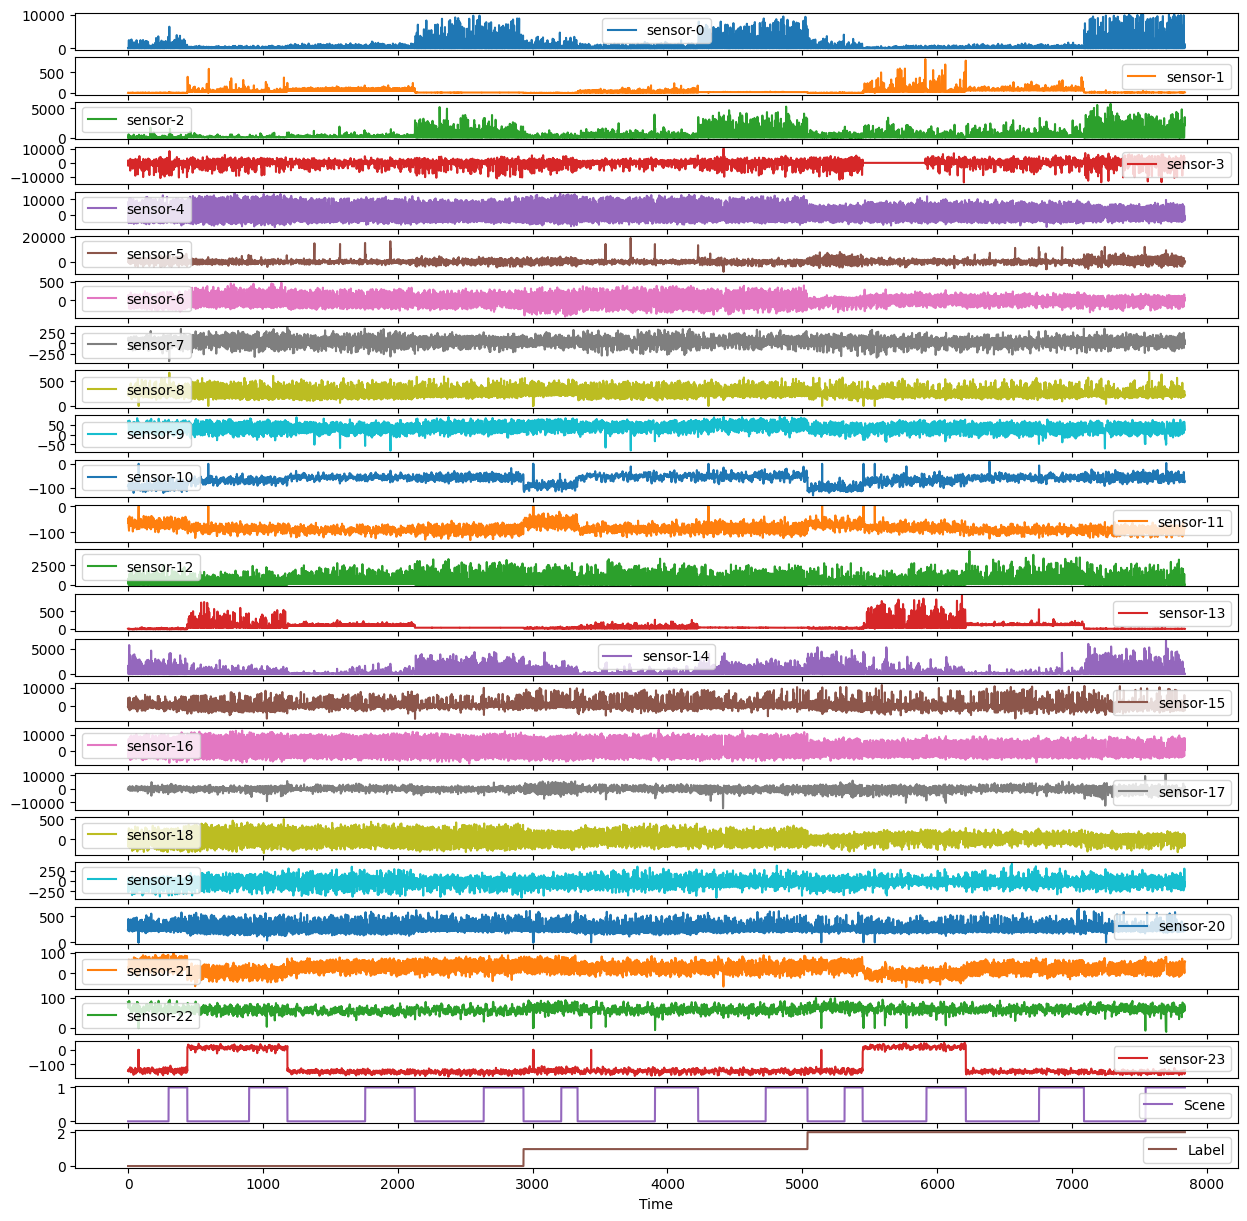

In [6]:
def prinUserSensorMatrix(S,L,Y):
    df = pd.DataFrame()
    ts=[]
    ls=[]
    
    for t in range(0,X.shape[0]):
        ts.append(t)
    df['Time']=ts
    #print(ts)
    for s in range(0,X.shape[2]):
        ls.append("sensor-"+str(s))
        vs=S[:,:,s]
        vs=vs[:,0]
        print(vs.shape)
        df["sensor-"+str(s)]=vs
    

    
    ss=[]
    for t in range(0,X.shape[0]):
        ss.append(L[t])
    df['Scene']=ss
    ls.append('Scene')
    
    ys=[]
    for t in range(0,X.shape[0]):
        ys.append(Y[t])
    df['Label']=ys
    ls.append('Label')

    print(ls)
    
    df.plot(x="Time",y=ls,subplots=True, legend=True, figsize=(15,15))    
    
prinUserSensorMatrix(X,S,Y)

In [7]:
print(X)       
print(X.shape)       

[[[ 5.52501071e+00  1.08475914e+00 -2.09790015e+01 ...  2.98018112e+01
    8.60225727e+01 -1.42852605e+02]
  [ 5.33282078e+00  3.91214930e-02 -2.09638215e+01 ...  3.70621865e+01
    8.47793805e+01 -1.45733126e+02]
  [ 8.33253247e+00  4.89018663e-02 -2.09511211e+01 ...  3.84624498e+01
    8.44085039e+01 -1.46030959e+02]
  ...
  [ 1.69134986e+01  4.29596953e-01  3.76004034e+01 ...  3.55378414e+01
    8.52903164e+01 -1.62820345e+02]
  [ 1.38270030e+01  7.55150894e-01  4.35505380e+01 ...  3.55917401e+01
    8.55937920e+01 -1.62742541e+02]
  [ 1.04890810e+01  1.40978204e+00  1.01867911e+02 ...  3.57928908e+01
    8.58426932e+01 -1.62380377e+02]]

 [[ 9.84282976e-01  1.31034517e-01 -2.09855063e+01 ...  2.00874179e+01
    8.51474303e+01 -1.38253118e+02]
  [ 6.99934561e-01  9.31801010e-02 -2.09857645e+01 ...  2.45298289e+01
    8.58102731e+01 -1.39809370e+02]
  [ 2.13603076e+00  2.84363101e-01 -2.09844605e+01 ...  2.92682766e+01
    8.60200646e+01 -1.42646760e+02]
  ...
  [ 2.90357305e+01  7.2

In [8]:
Y=to_categorical(Y)

In [9]:
print("nan:",np.argwhere(np.isnan(X)))
print(X[np.argwhere(np.isnan(X))])

nan: []
[]


In [10]:
from tensorflow import keras

from tensorflow.keras import layers
from keras.optimizers import Adam
from keras.layers import MaxPooling2D,Activation, Dense

from tensorflow import Tensor
from tensorflow.keras.layers import Input, Conv1D, Conv2D, ReLU, BatchNormalization,\
                                    Add, AveragePooling2D, Flatten, Dense,Dropout,LSTM,TimeDistributed,MaxPooling1D
from tensorflow.keras.models import Model

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt



classes=["der","sim","izq"]

Y_pred_total=np.array([])
Y_val_total=np.array([])

print(Y_val_total)


for sceneid in np.unique(S):

    print("SCENE:",sceneid)
    index_test=np.where(S == sceneid)[0]
    index_train=np.where(S != sceneid)[0]

    print("index_test",index_test)
    print("index_train",index_train)

    x_train=X[index_train]
    x_val=X[index_test]
    y_train=Y[index_train]
    y_val=Y[index_test]
    
    print(x_train)
    print(x_val)

    #normalizamos valores 
    for ixv in range(0,X.shape[2]):
        print(x_train[:,:,ixv])
        avg_v=np.nanmean(x_train[:,:,ixv].flatten())
        std_v=np.nanstd(x_train[:,:,ixv].flatten())
        print("avg_v,std_v:",avg_v,std_v)
        x_train[:,:,ixv]=(x_train[:,:,ixv]-avg_v)/(std_v)
        x_val[:,:,ixv]=(x_val[:,:,ixv]-avg_v)/(std_v)

    model = keras.Sequential()

    model.add(Conv1D(filters=16, kernel_size=2, activation='relu', input_shape=(X.shape[1],X.shape[2])))
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
    model.add(Dropout(0.25))

    model.add(LSTM(256, return_sequences=True))
    model.add(Dropout(0.25))
    model.add(LSTM(256))

    model.add(Flatten())
    model.add(Dense(2048))
    model.add(Dense(1024))
    model.add(Dense(len(classes), activation="softmax"))

    model.compile(loss='categorical_crossentropy', optimizer='rmsprop',  metrics=['accuracy'])
    model.summary()

    history = model.fit(x_train , y_train,
                        batch_size=64,
                validation_data=(x_val,y_val),
                epochs=25)


    y_pred = model.predict(x_val).argmax(axis=1)
    y_val=y_val.argmax(axis=1)
    print(y_pred)
    print(y_val)
    Y_pred_total=np.concatenate((Y_pred_total,y_pred))
    Y_val_total=np.concatenate((Y_val_total,y_val))

    

    

[]
SCENE: 0
index_test [   0    1    2 ... 7543 7544 7545]
index_train [ 301  302  303 ... 7835 7836 7837]
[[[ 8.28091517e+00  4.90024834e+00 -2.05260909e+01 ...  2.13763784e+01
    8.77471233e+01 -1.43890946e+02]
  [ 8.28091517e+00  3.92019867e+00 -2.06181528e+01 ...  2.94410827e+01
    8.73852329e+01 -1.46747662e+02]
  [ 1.03729904e+01  7.21350351e+00 -1.97266036e+01 ...  3.03013534e+01
    8.73572392e+01 -1.47184578e+02]
  ...
  [ 5.35185382e+01  6.47772455e-01  3.08999470e+01 ... -2.33690463e+00
   -5.74121474e+01 -1.84017441e+02]
  [ 2.26518842e+02  2.75372611e+00  2.33605883e+02 ...  2.72658239e+00
   -6.47583628e+01 -1.83345432e+02]
  [ 1.53742922e+02  1.18418229e-03  9.12226921e+02 ...  7.97809568e+00
   -6.48729334e+01 -1.82314918e+02]]

 [[ 7.99905897e+00  4.84294738e-01  6.32556819e+01 ...  1.34568234e+01
    8.45454562e+01 -1.41582706e+02]
  [ 2.37956962e+00  8.22125249e-01 -1.71470664e+01 ...  1.72017317e+01
    8.73472174e+01 -1.41971625e+02]
  [ 7.26187017e+00  2.5089271

/home/aurora/miniconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1734537916.699884  129881 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 782 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4070 Ti SUPER, pci bus id: 0000:01:00.0, compute capability: 8.9


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 100, 16)        │           784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 98, 32)         │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 98, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 96, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 94, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 94, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 94, 256)        │       394,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 94, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 256)            │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2048)           │       526,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │         3,075 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,580,403 (13.66 MB)

 Trainable params: 3,580,403 (13.66 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25


I0000 00:00:1734538099.136986  132061 cuda_dnn.cc:529] Loaded cuDNN version 90300


46/46 ━━━━━━━━━━━━━━━━━━━━ 199s 339ms/step - accuracy: 0.3721 - loss: 1.1159 - val_accuracy: 0.3762 - val_loss: 1.0031
Epoch 2/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 123ms/step - accuracy: 0.5096 - loss: 0.9376 - val_accuracy: 0.5701 - val_loss: 0.8153
Epoch 3/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 8s 154ms/step - accuracy: 0.6225 - loss: 0.7205 - val_accuracy: 0.6356 - val_loss: 0.7559
Epoch 4/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 124ms/step - accuracy: 0.6846 - loss: 0.7422 - val_accuracy: 0.4513 - val_loss: 1.0449
Epoch 5/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 7s 127ms/step - accuracy: 0.6726 - loss: 0.6297 - val_accuracy: 0.7184 - val_loss: 1.1010
Epoch 6/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - accuracy: 0.7834 - loss: 0.5254 - val_accuracy: 0.7729 - val_loss: 1.1506
Epoch 7/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 7s 153ms/step - accuracy: 0.8189 - loss: 0.4784 - val_accuracy: 0.8721 - val_loss: 0.5576
Epoch 8/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 7s 153ms/step - accuracy: 0.9208 - loss: 0.2318 - val_accuracy: 0.9483 - va

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)               │ (None, 100, 16)        │           784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 98, 32)         │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 98, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ (None, 96, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 94, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 94, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 94, 256)        │       394,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 94, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 256)            │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2048)           │       526,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │         3,075 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,580,403 (13.66 MB)

 Trainable params: 3,580,403 (13.66 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
78/78 ━━━━━━━━━━━━━━━━━━━━ 10s 106ms/step - accuracy: 0.3963 - loss: 1.1300 - val_accuracy: 0.5620 - val_loss: 0.9093
Epoch 2/25
78/78 ━━━━━━━━━━━━━━━━━━━━ 7s 92ms/step - accuracy: 0.7332 - loss: 0.6827 - val_accuracy: 0.8695 - val_loss: 0.2799
Epoch 3/25
78/78 ━━━━━━━━━━━━━━━━━━━━ 9s 110ms/step - accuracy: 0.8976 - loss: 0.4780 - val_accuracy: 0.9889 - val_loss: 0.0504
Epoch 4/25
78/78 ━━━━━━━━━━━━━━━━━━━━ 8s 109ms/step - accuracy: 0.9513 - loss: 0.1681 - val_accuracy: 0.9758 - val_loss: 0.0672
Epoch 5/25
78/78 ━━━━━━━━━━━━━━━━━━━━ 9s 111ms/step - accuracy: 0.9613 - loss: 0.1630 - val_accuracy: 0.9851 - val_loss: 0.0729
Epoch 6/25
78/78 ━━━━━━━━━━━━━━━━━━━━ 9s 112ms/step - accuracy: 0.9798 - loss: 0.0939 - val_accuracy: 0.9695 - val_loss: 0.1781
Epoch 7/25
78/78 ━━━━━━━━━━━━━━━━━━━━ 8s 109ms/step - accuracy: 0.9805 - loss: 0.0974 - val_accuracy: 0.9934 - val_loss: 0.0341
Epoch 8/25
78/78 ━━━━━━━━━━━━━━━━━━━━ 10s 123ms/step - accuracy: 0.9820 - loss: 0.0960 - val_accuracy: 0

                                                                 
 conv1d_5 (Conv1D)           (None, 98, 32)            1568      
                                                                 
 dropout_3 (Dropout)         (None, 98, 32)            0         
                                                                 
 conv1d_6 (Conv1D)           (None, 96, 64)            6208      
                                                                 
 conv1d_7 (Conv1D)           (None, 94, 128)           24704     
                                                                 
 dropout_4 (Dropout)         (None, 94, 128)           0         
                                                                 
 lstm_2 (LSTM)               (None, 94, 256)           394240    
                                                                 
 dropout_5 (Dropout)         (None, 94, 256)           0         
                                                                 
 lstm_3 (L

[2. 2. 2. ... 2. 2. 2.]
[0. 0. 0. ... 2. 2. 2.]
[[2852   33   48]
 [  33 2020   53]
 [  30   43 2726]]
Classification Report TOTAL
              precision    recall  f1-score   support

         der       0.98      0.97      0.98      2933
         sim       0.96      0.96      0.96      2106
         izq       0.96      0.97      0.97      2799

    accuracy                           0.97      7838
   macro avg       0.97      0.97      0.97      7838
weighted avg       0.97      0.97      0.97      7838



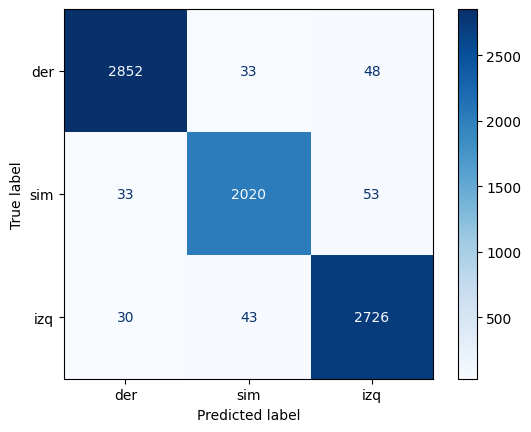

In [11]:
print(Y_pred_total)
print(Y_val_total)

cm = confusion_matrix(Y_val_total, Y_pred_total) 
print(cm)
print('Classification Report TOTAL')
print(classification_report(Y_val_total, Y_pred_total, target_names=classes))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)

disp.plot(cmap=plt.cm.Blues)
plt.show()